# Pandas EDA Example - wine dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

For this tutorial, you’ll use the wine quality data set that you can find in the wine quality data set from the UCI Machine Learning Repository.

In [2]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
print(white.shape)
# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red.shape)

(4898, 12)
(1599, 12)


## Exploratory Data Analysis

In [3]:
white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
# Take a sample of 5 rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1049,9.3,0.50,0.36,1.8,0.084,6.0,17.0,0.99704,3.27,0.77,10.8,6
1330,7.4,0.60,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8,6
215,7.0,0.49,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,5
794,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6
1463,6.9,0.63,0.01,2.4,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,6


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Alcohol
One variable that you could find interesting at first sight is alcohol. It’s probably one of the first things that catches your attention when you’re inspecting a wine data set. You can visualize the distributions with any data visualization library, but in this case, the tutorial makes use of matplotlib to plot the distributions quickly:

As you can see in the image below, you see that the alcohol levels between the red and white wine are mostly the same: they have around 9% of alcohol. Of course, there are also a considerable amount of observations that have 10% or 11% of alcohol percentage.

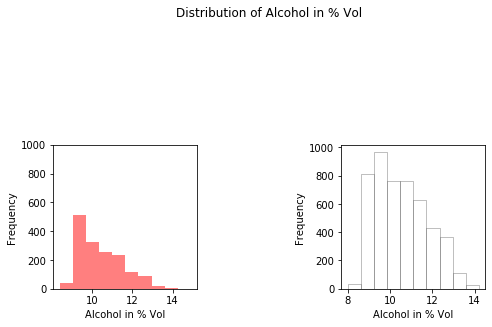

In [6]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

Note that you can double check this if you use the histogram() function from the numpy package to compute the histogram of the white and red data, just like this:

In [7]:
import numpy as np
np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15])

(array([   0,  317, 1606, 1256,  906,  675,  131,    7]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))

#### Sulfates
Next, one thing that interests me is the relation between the sulfates and the quality of the wine. As you have read above, sulfates can cause people to have headaches, and I’m wondering if this influences the quality of the wine. What’s more, I often hear that women especially don’t want to drink wine precisely because it causes headaches. Maybe this affects the ratings for the red wine? Let’s take a look.

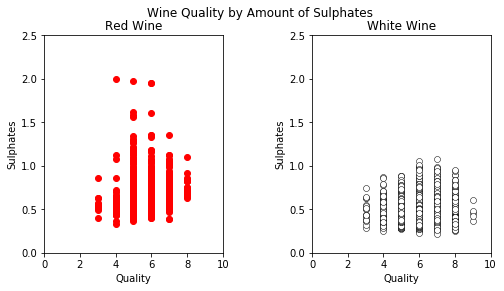

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

#### Acidity
Apart from the sulfates, the acidity is one of the major and vital wine characteristics that is necessary to achieve quality wines. Great wines often balance out acidity, tannin, alcohol, and sweetness. Some more research taught me that in quantities of 0.2 to 0.4 g/L, volatile acidity doesn’t affect a wine’s quality. At higher levels, however, volatile acidity can give the wine a sharp, vinegary tactile sensation. Extreme volatile acidity signifies a seriously flawed wine.

Let’s put the data to the test and make a scatter plot that plots the alcohol versus the volatile acidity. The data points should be colored according to their rating or quality label:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

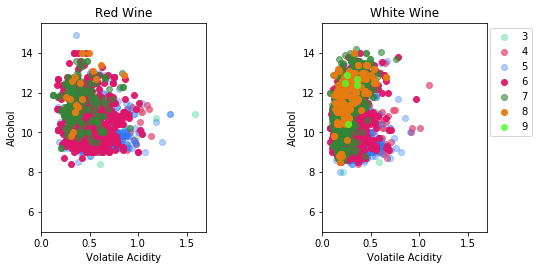

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

## Preprocess the Data

Now that you have explored your data, it’s time to act upon the insights that you have gained! Let’s preprocess the data so that you can start building your own neural network! You set ignore_index to True in this case because you don’t want to keep the index labels of white when you’re appending the data to red: you want the labels to continue from where they left off in red, not duplicate index labels from joining both data sets together.

In [10]:
# Add `type` column to `red` with value 1
red['type'] = 1
print(red.shape)
# Add `type` column to `white` with value 0
white['type'] = 0
print(white.shape)
# Append `white` to `red`
wines = red.append(white, ignore_index=True)
print(wines.shape)

(1599, 13)
(4898, 13)
(6497, 13)


#### Correlation Matrix
Now that you have the full data set, it’s a good idea to also do a quick data exploration; You already know some stuff from looking at the two data sets separately, and now it’s time to gather some more solid insights, perhaps.

Since it can be somewhat difficult to interpret graphs, it’s also a good idea to plot a correlation matrix. This will give insights more quickly about which variables correlate:

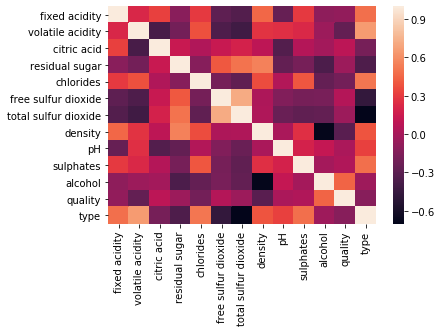

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()